## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn
import kagglehub

## Loading the data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /home/timhug/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [3]:
import pandas as pd

# Specify the path to the CSV file
file_path = '/home/timhug/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1/heart.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data type conversions


In [4]:
# Transform relevant columns to categorical
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
df[categorical_columns] = df[categorical_columns].astype('category')

# Confirm changes
print(df.dtypes)


Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease      category
dtype: object


## EDA: Categorical variables

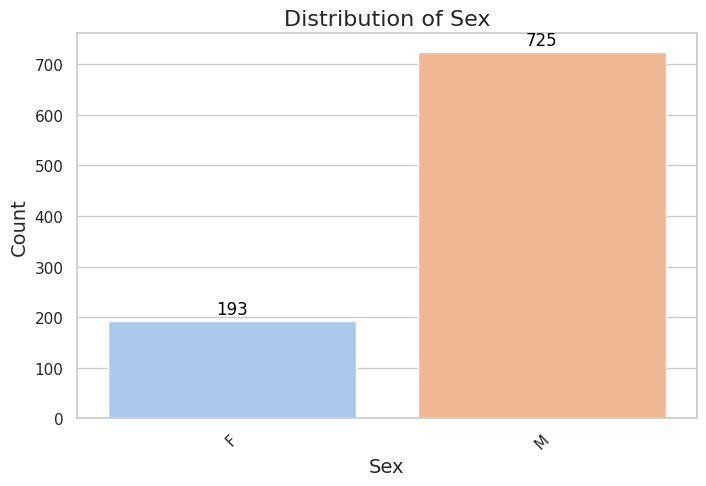

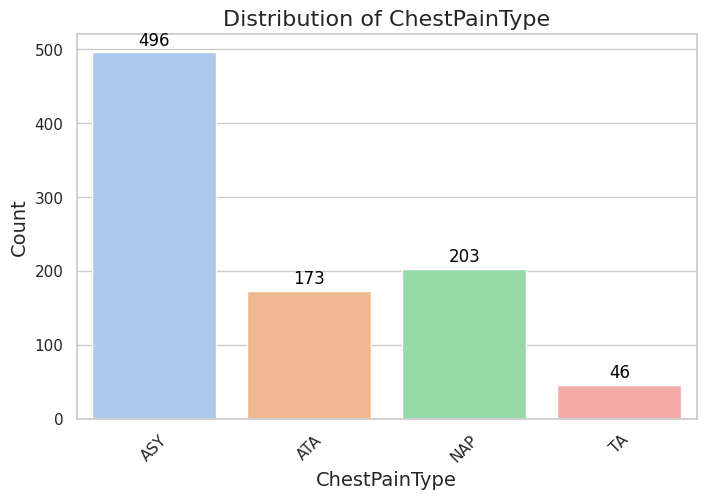

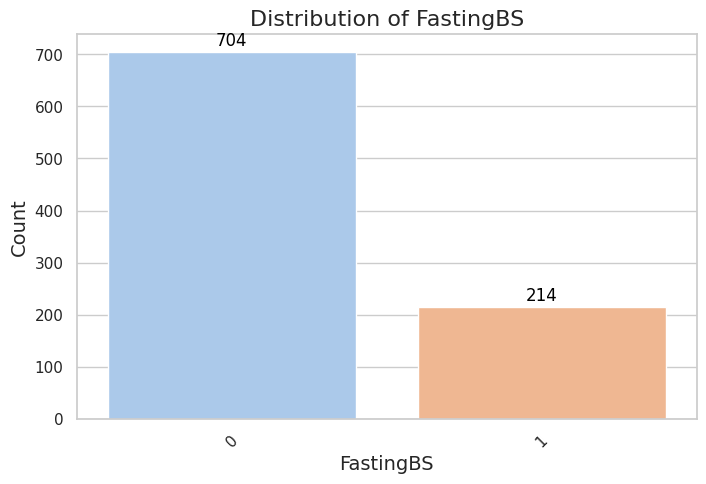

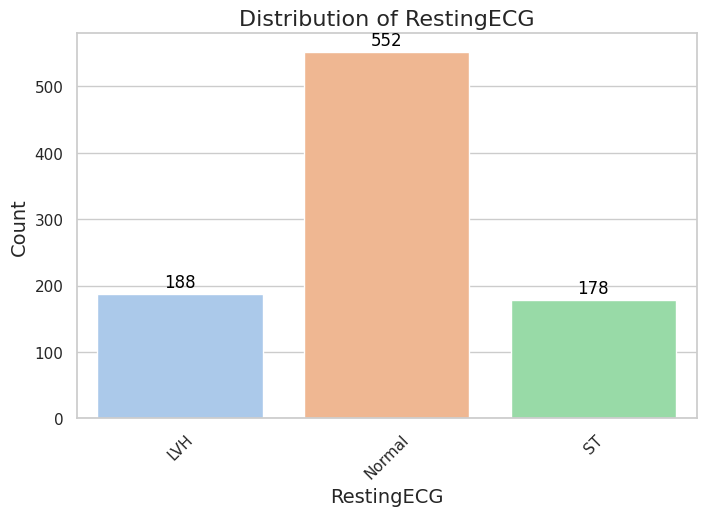

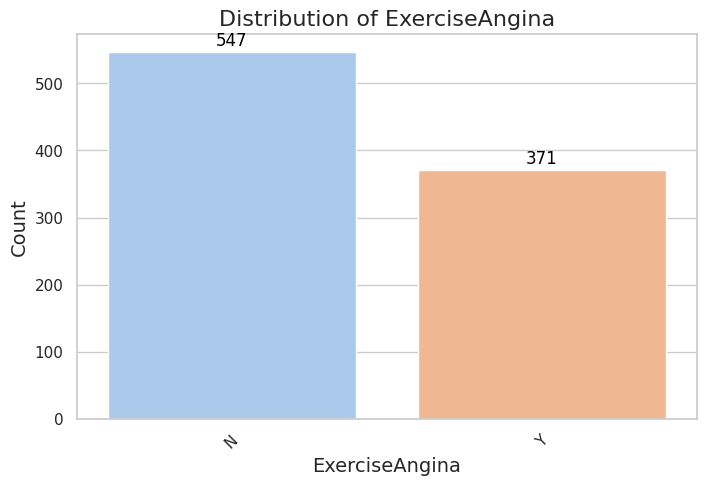

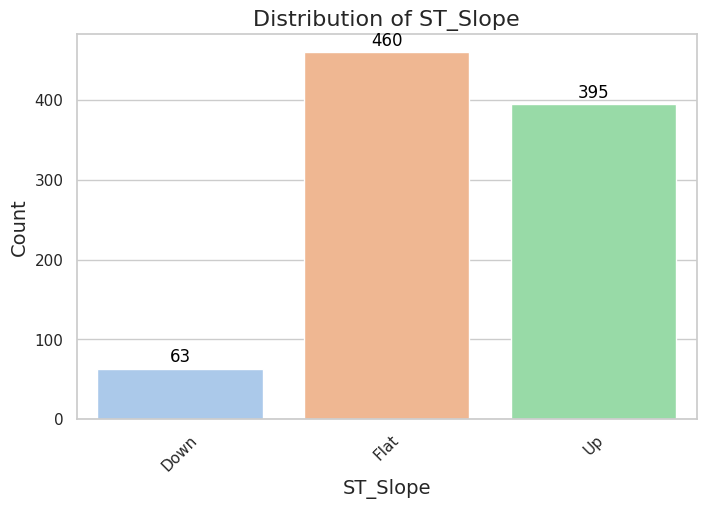

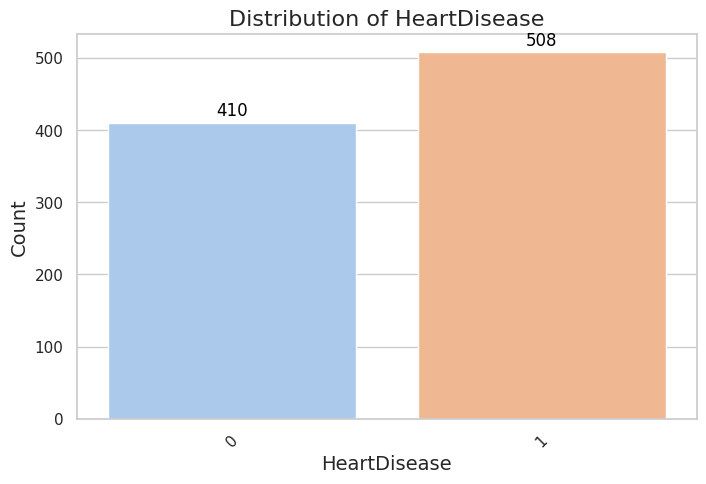

In [5]:
# Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Set plot style
sns.set(style="whitegrid")

# Create barplots
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue=col, dodge=False, palette="pastel", legend=False)
    
    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='baseline',
            fontsize=12, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    # Set titles and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


- We can see that the target variable is relatively balanced

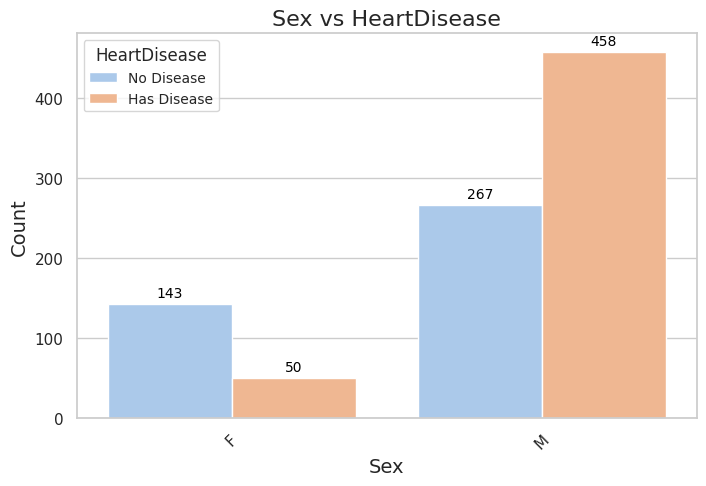

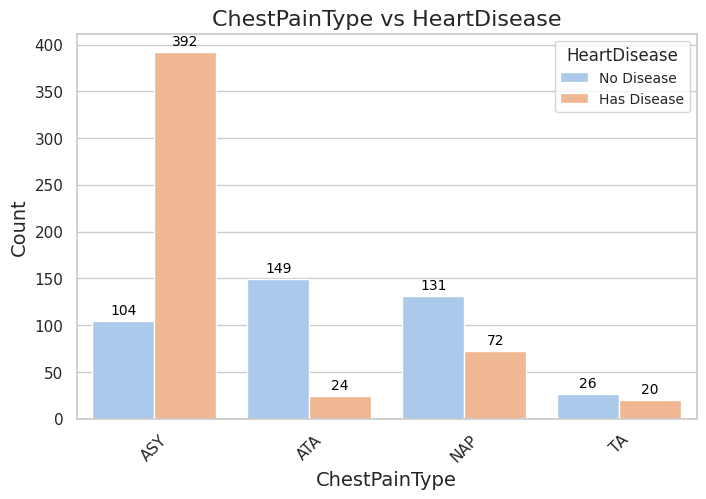

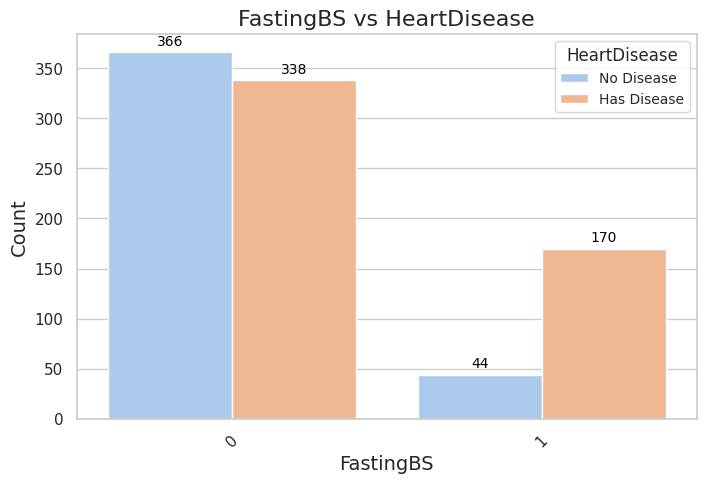

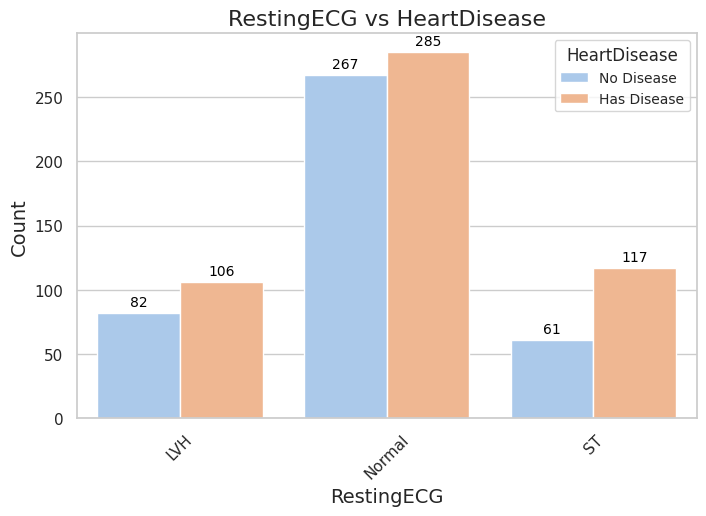

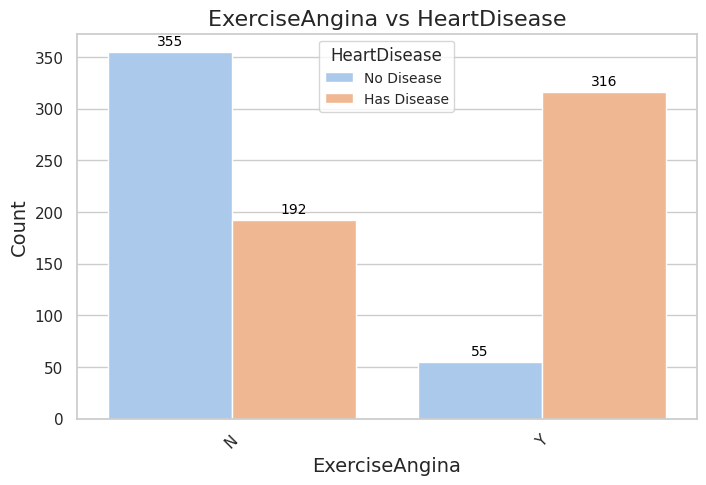

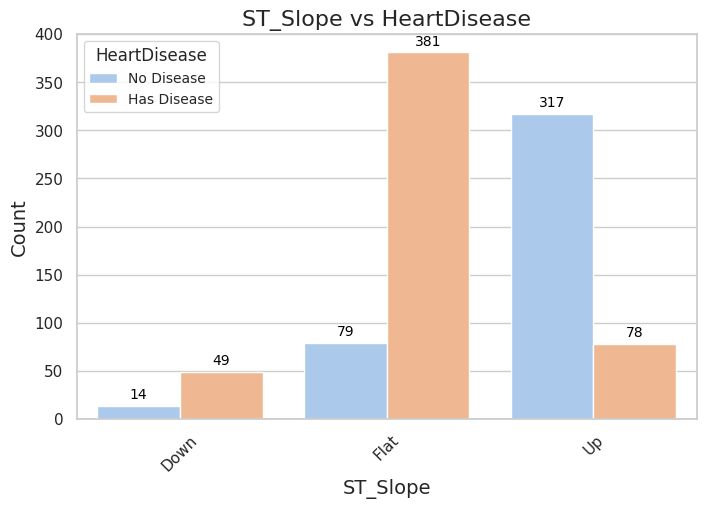

In [6]:
# Bivariate analysis: categorical features vs target variable (HeartDisease)
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Set plot style
sns.set(style="whitegrid")

# Create plots for each categorical variable against HeartDisease
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue='HeartDisease', palette="pastel")
    
    # Add counts on top of the bars
    for p in ax.patches:
        # Get the height (count) of the bar
        count = int(p.get_height())
        
        # Only annotate if count is greater than 0
        if count > 0:
            ax.annotate(
                f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='baseline',
                fontsize=10, 
                color='black', 
                xytext=(0, 5), 
                textcoords='offset points'
            )
    
    # Customize plot
    plt.title(f'{col} vs HeartDisease', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='HeartDisease', labels=['No Disease', 'Has Disease'], fontsize=10)
    plt.xticks(rotation=45)
    plt.show()









## EDA: Numerical variables

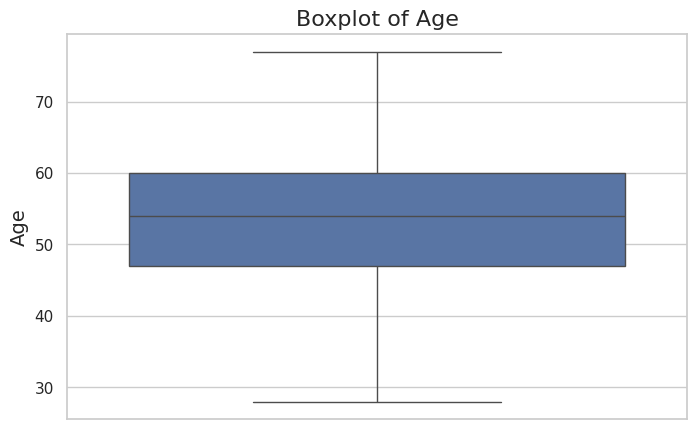

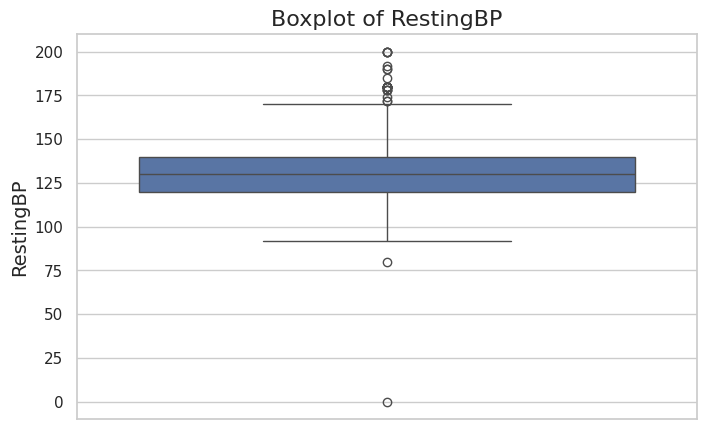

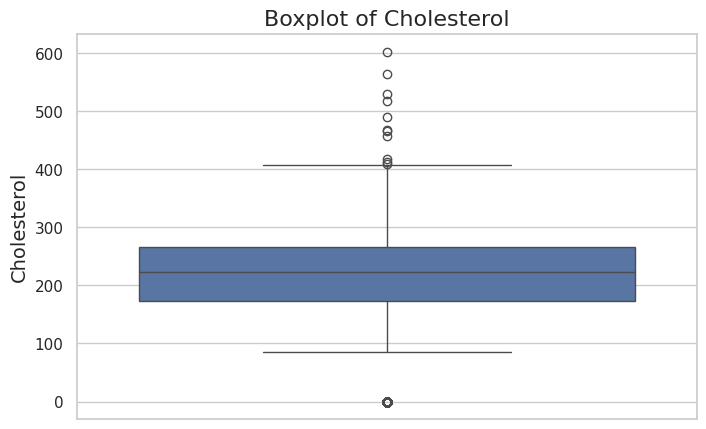

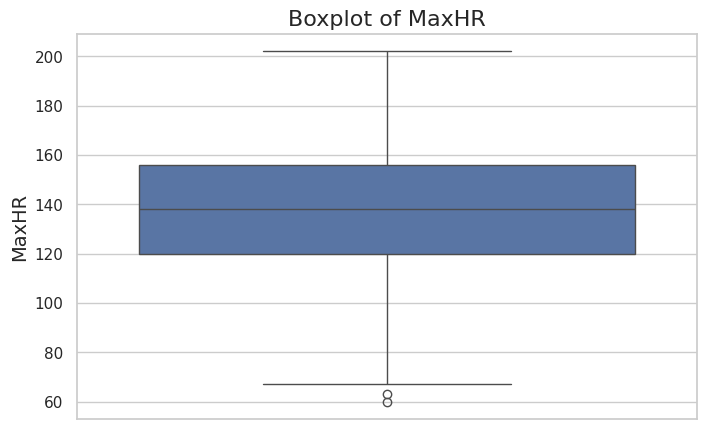

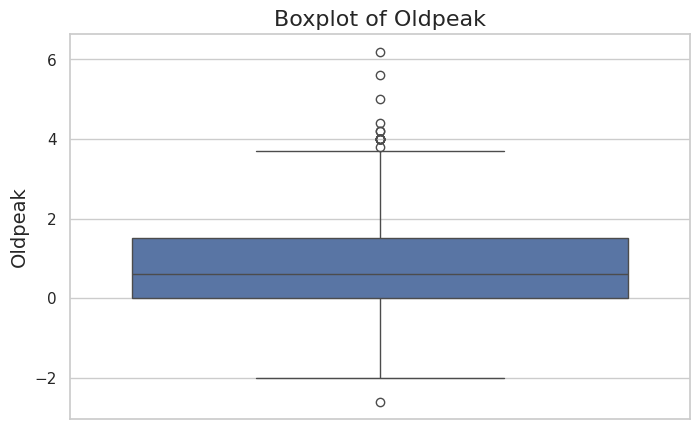

In [7]:
# Univariate analysis for numerical variables: Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    
    # Set titles and labels
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('')
    plt.show()

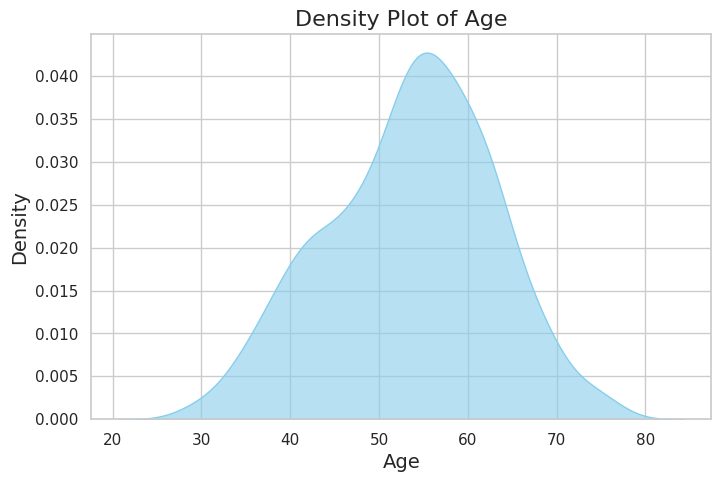

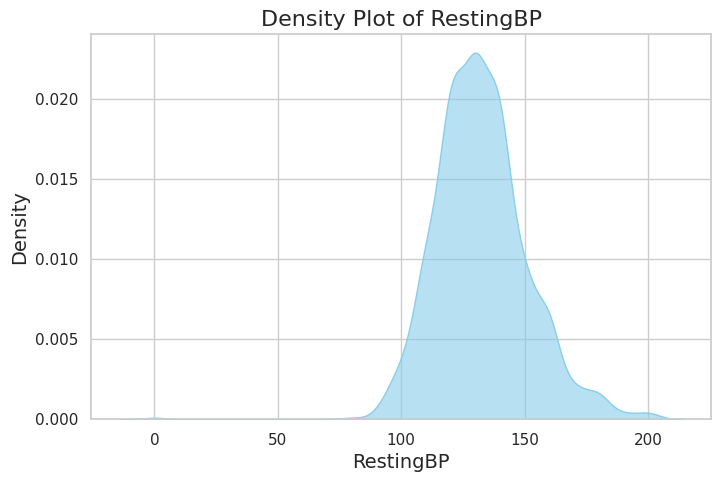

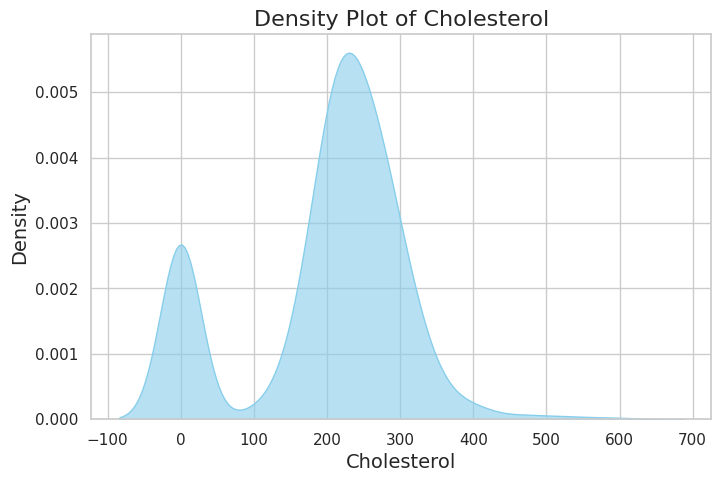

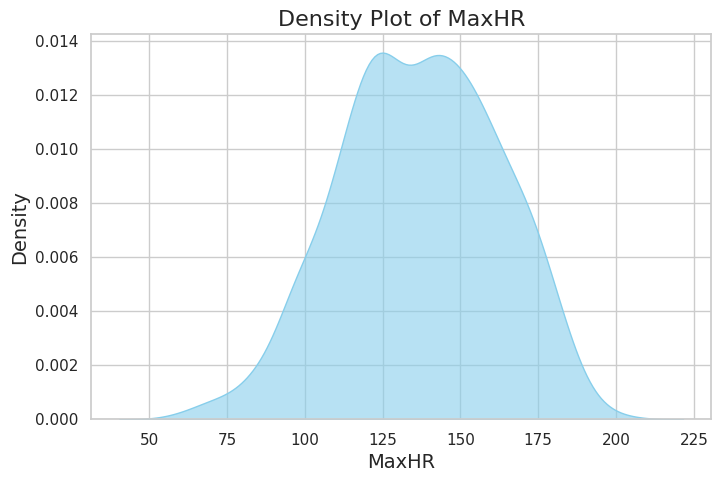

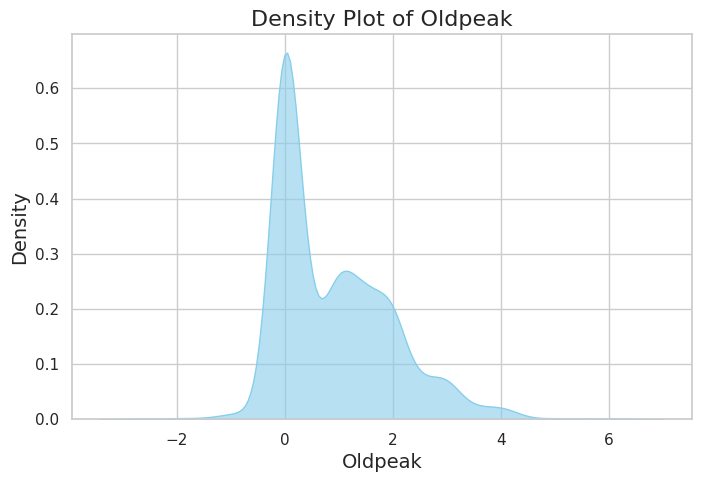

In [8]:
# Univariate analysis for numerical variables: Density plots

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Set plot style
sns.set(style="whitegrid")

# Create density plots for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue', alpha=0.6)  # Removed 'shade=True'
    
    # Customize plot
    plt.title(f'Density Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()

In [9]:
import pandas as pd

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a list to store summary statistics
summary_stats = []

# Calculate statistics for each numerical column
for col in numerical_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    value_range = max_val - min_val
    variance = df[col].var()  # Variance calculation
    
    # Append the results as a dictionary
    summary_stats.append({
        'Feature': col,
        'Min value': min_val,
        'Max value': max_val,
        'Range': value_range,
        'Variance': variance
    })

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(summary_stats)

# Display the DataFrame
summary_df

,Feature,Min value,Max value,Range,Variance
0,Age,28.0,77.0,49.0,88.974254
1,RestingBP,0.0,200.0,200.0,342.773903
2,Cholesterol,0.0,603.0,603.0,11964.891079
3,MaxHR,60.0,202.0,142.0,648.228614
4,Oldpeak,-2.6,6.2,8.8,1.137572


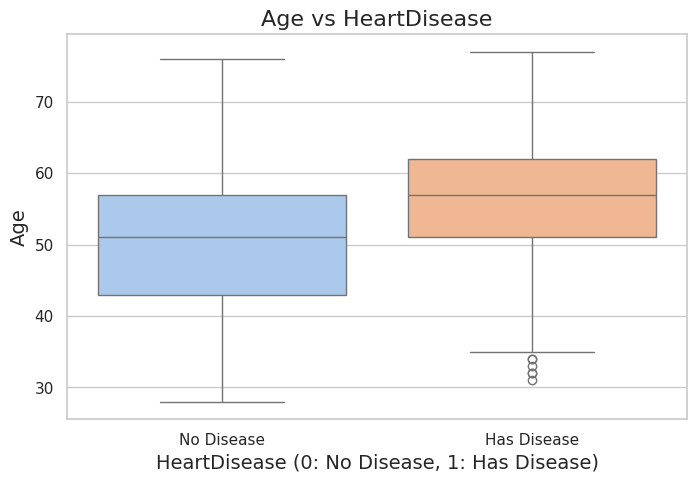

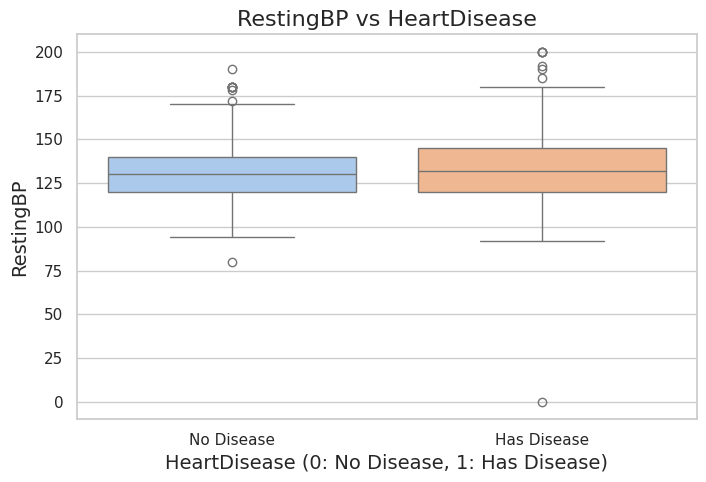

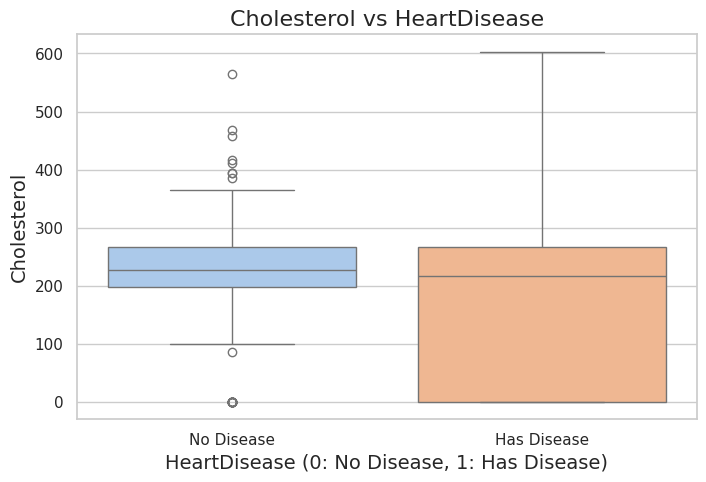

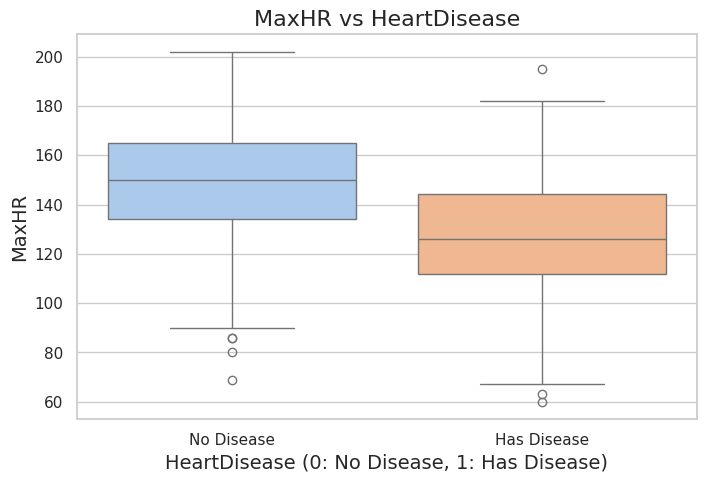

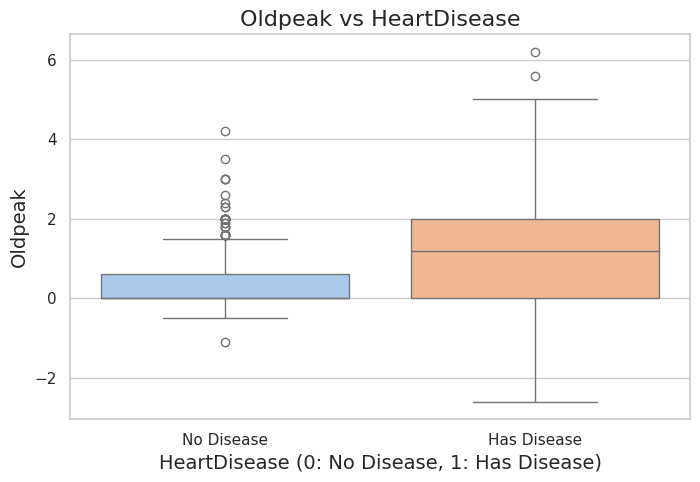

In [10]:
# Bivariate Analysis: Numerical features vs target feature (HeartDisease)

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure HeartDisease is treated as categorical
df['HeartDisease'] = df['HeartDisease'].astype('category')

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create boxplots for numerical features against HeartDisease
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='HeartDisease', y=col, hue='HeartDisease', palette="pastel", dodge=False, legend=False)
    
    # Customize plot
    plt.title(f'{col} vs HeartDisease', fontsize=16)
    plt.xlabel('HeartDisease (0: No Disease, 1: Has Disease)', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks([0, 1], ['No Disease', 'Has Disease'])
    plt.show()



## EDA: Feature Importance

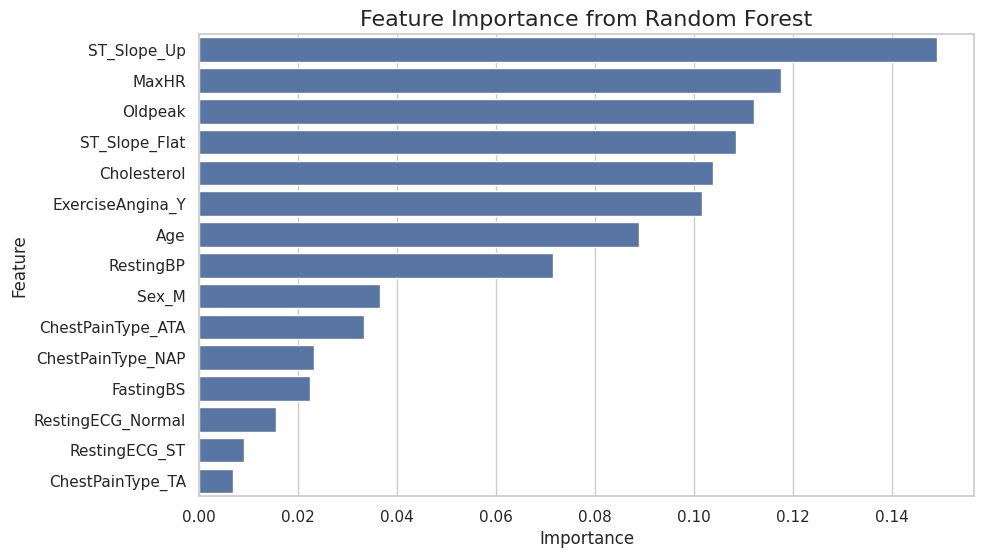

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: One-hot encoding of categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 2: Prepare features and target variable
X = df_encoded.drop(columns=['HeartDisease'])  # Features
y = df_encoded['HeartDisease']  # Target variable

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Step 6: Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 7: Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 8: Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

## Data Preprocessing

In [12]:
# Handling NULL values
# Print number of NULL values for all columns
null_counts = df.isnull().sum()
print(null_counts)


# There are no NULL Values in the Dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [13]:
# One-hot encoding of categorical features


# Identify categorical columns (e.g., dtype == object or category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [14]:
# Min Max scaling of numerical features
# This is not necessary for random forest, but for other algorithms which are distance-based
# Some algos have different requirements for preprocessing than others 
from sklearn.preprocessing import MinMaxScaler


# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Scales All Features to the Same Range: Each feature's values are normalized to lie within the specified range, commonly [0, 1].

# Display the result
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1
0,0.244898,0.70,0.479270,0.788732,0.295455,True,True,False,False,False,True,False,False,False,True,False
1,0.428571,0.80,0.298507,0.676056,0.409091,False,False,True,False,False,True,False,False,True,False,True
2,0.183673,0.65,0.469320,0.267606,0.295455,True,True,False,False,False,False,True,False,False,True,False
3,0.408163,0.69,0.354892,0.338028,0.465909,False,False,False,False,False,True,False,True,True,False,True
4,0.530612,0.75,0.323383,0.436620,0.295455,True,False,True,False,False,True,False,False,False,True,False


In [15]:
# Creating Feature Matrix X and target var series y
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

## Modeling: Mutltiple models and hyper parameter tuning

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd

# Set the random seed for reproducibility
random_seed = 42

# Split the dataset into training and hold-out test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Initialize the models and their parameter grids with larger values
models = {
    "SVC": SVC(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(random_state=random_seed),
    "XGBoost": xgb.XGBClassifier(seed=random_seed)  # In XGBoost, the random seed is set via `seed`
}

param_grids = {
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    }
}

# Initialize a list to store all results
all_results = []

# Define the cross-validation strategy with random_state
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Iterate over each model and its corresponding grid of hyperparameters
for model_name, model in models.items():
    print(f"Training {model_name}...\n")
    
    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Perform GridSearchCV with 5-fold cross-validation 
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Fit on the training data
    
    # Calculate the number of fits
    k_folds = 5
    n_param_combinations = 1
    for value in param_grid.values():
        n_param_combinations *= len(value)
    n_fits = k_folds * n_param_combinations
    
    # Print the number of fits for the current model
    print(f"Number of fits for {model_name}: {n_fits}")
    
    # Extract the results for the current grid search
    cv_results = grid_search.cv_results_
    
    # Store the results along with test set accuracy
    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Iterate through the results and store the test accuracy and corresponding hyperparameters
    for mean_test_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        all_results.append({
            'model': model_name,
            'mean_cv_accuracy': mean_test_score,
            'test_accuracy': test_accuracy,  # Store the test accuracy
            'hyperparameters': params
        })
    
    # Print the best score and best hyperparameters for the current model
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Test set accuracy for {model_name}: {test_accuracy:.4f}")
    print("\n" + "="*50)

# Sort all results by test accuracy in descending order
sorted_results = sorted(all_results, key=lambda x: x['test_accuracy'], reverse=True)

# Get the overall winner (model with the highest test accuracy)
best_result = sorted_results[0]
print("\nOverall Winner (based on test set accuracy):")
print(f"Model: {best_result['model']}")
print(f"Test Accuracy: {best_result['test_accuracy']:.4f}")
print(f"Best Hyperparameters: {best_result['hyperparameters']}")


Training SVC...

Number of fits for SVC: 60
Best cross-validation accuracy for SVC: 0.8610
Best hyperparameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test set accuracy for SVC: 0.8587

Training Random Forest...

Number of fits for Random Forest: 40
Best cross-validation accuracy for Random Forest: 0.8678
Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Test set accuracy for Random Forest: 0.8750

Training Logistic Regression...

Number of fits for Logistic Regression: 30
Best cross-validation accuracy for Logistic Regression: 0.8610
Best hyperparameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Test set accuracy for Logistic Regression: 0.8533

Training XGBoost...

Number of fits for XGBoost: 40
Best cross-validation accuracy for XGBoost: 0.8637
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test set accuracy for XGBoost: 0.8804


Overall Winner (based on te

In [ ]:
# Now training the best model on the entire data 

# Identify the best model based on the sorted results
best_model_name = best_result['model']
best_hyperparameters = best_result['hyperparameters']

# Reinitialize the best model with the optimal hyperparameters
if best_model_name == "SVC":
    best_model = SVC(**best_hyperparameters, random_state=random_seed)
elif best_model_name == "Random Forest":
    best_model = RandomForestClassifier(**best_hyperparameters, random_state=random_seed)
elif best_model_name == "Logistic Regression":
    best_model = LogisticRegression(**best_hyperparameters, random_state=random_seed)
elif best_model_name == "XGBoost":
    best_model = xgb.XGBClassifier(**best_hyperparameters, seed=random_seed)
else:
    raise ValueError(f"Unknown model name: {best_model_name}")

# Train the best model on the entire dataset (X, y)
print(f"\nTraining the best model ({best_model_name}) on the full dataset...")
best_model.fit(X, y)




Training the best model (XGBoost) on the full dataset...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Saving the mbest model that has been trained on the entire data
# Save the trained model as a pickle file
import pickle


pickle_filename = f"best_model_{best_model_name.lower().replace(' ', '_')}.pkl"
with open(pickle_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nThe best model ({best_model_name}) has been saved as '{pickle_filename}'.")



The best model (XGBoost) has been saved as 'best_model_xgboost.pkl'.
